In [ ]:
# import libraries and set display options
import pandas as pd
import pprint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# set frame width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# pretty print options
pd.options.display.float_format = '{:20,.4f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 3000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# open file
x_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")

# strip brackets and trailing space from country names
# replace remaining space with underscore
# lower case all column names
x_rates.columns = x_rates.columns.str.replace("[","").str.replace("]","")
x_rates.columns = x_rates.columns.str.rstrip()
x_rates.columns = x_rates.columns.str.replace(" ","_")
x_rates.columns = x_rates.columns.str.lower()

# rename columns
x_rates.rename(columns={"period\\unit:":"date",
                        "chinese_yuan_renminbi":"chinese_yuan",
                        "uk_pound_sterling":"uk_pound"}, inplace=True)

# convert datetime
x_rates["date"] = pd.to_datetime(x_rates["date"])

# resort and reindex
x_rates.sort_values("date", inplace=True)
x_rates.reset_index(drop=True, inplace=True)

# convert hyphens in currency columns to NaN
import numpy as np
x_rates = x_rates.replace("-", np.nan)

# convert exchange rate values to float
x_rates.iloc[:,1:] = x_rates.iloc[:,1:].astype(float)

# create a list of data frame names
# not sure this is neccessary but trying df = df_list.index(currency) in the framer function doesn't seem to work
# create a list of data frames for each currency with log rate of the exchange rate, 30 day rolling mean, and year
col_names = []
df_dict = {}
for currency in x_rates.columns[1:]:
    df_name = currency
    col_names.append(df_name)
    df = x_rates[["date", currency]].copy()
    df = df[df[currency].notna()]
    df["log_rate"] = np.log(df.iloc[:,1]/df.iloc[:,1].shift()) # getting the log of the exchange rate # double check this is the correct way to get log
    df["rolling_mean_30"] = df[currency].rolling(30).mean()
    df["year"] = df["date"].dt.year
    df_dict[currency] = df

In [ ]:
print(plt.style.available)

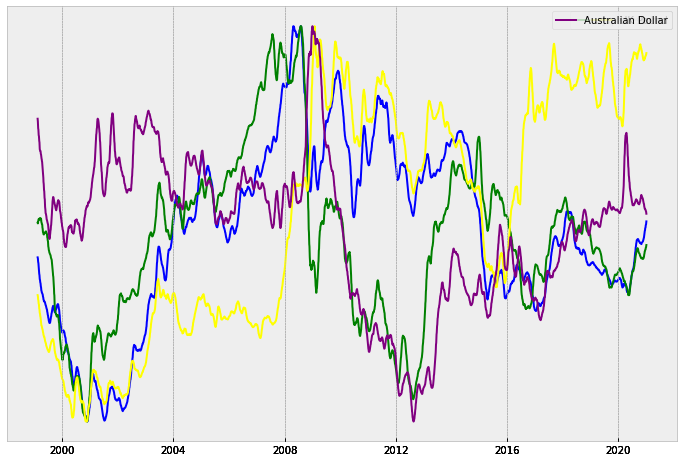

In [26]:
# list of countries for comparisson    
c_list = ["us_dollar", "japanese_yen", "uk_pound", "australian_dollar",
          "israeli_shekel", "philippine_peso", "malaysian_ringgit", "romanian_leu"]

# image
x_values1 = df_dict["us_dollar"]["date"]
y_values1 = df_dict["us_dollar"]["rolling_mean_30"]
x_values2 = df_dict["japanese_yen"]["date"]
y_values2 = df_dict["japanese_yen"]["rolling_mean_30"]
x_values3 = df_dict["uk_pound"]["date"]
y_values3 = df_dict["uk_pound"]["rolling_mean_30"]
x_values4 = df_dict["australian_dollar"]["date"]
y_values4 = df_dict["australian_dollar"]["rolling_mean_30"]
plt.style.use("bmh")
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, label = "1")
ax2 = fig.add_subplot(111, label = "2", frame_on = False)
ax3 = fig.add_subplot(111, label = "3", frame_on = False)
ax4 = fig.add_subplot(111, label = "4", frame_on = False)
ax.plot(x_values1, y_values1, label="US Dollar", color = "blue")
ax2.plot(x_values2, y_values2, label="Japanese Yen", color = "green")
ax3.plot(x_values3, y_values3, label="UK Pound", color = "yellow")
ax4.plot(x_values4, y_values4, label="Australian Dollar", color = "purple")
for ax in ax, ax2, ax3, ax4:
    ax.set_yticks([])
    ax.legend()

plt.show()

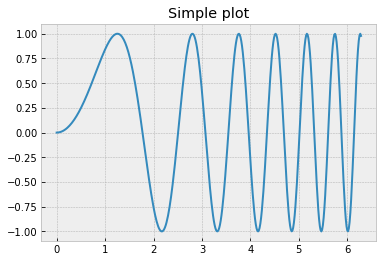

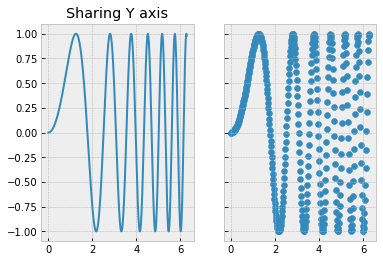

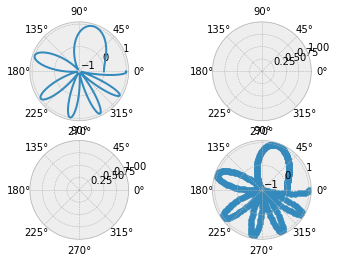

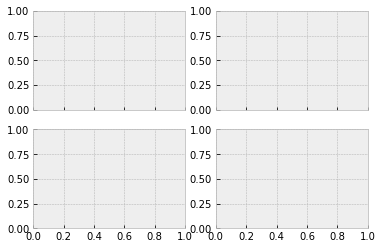

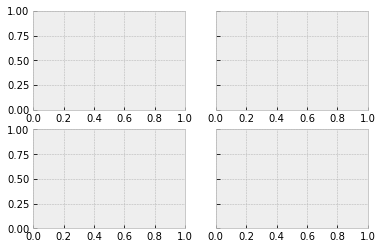

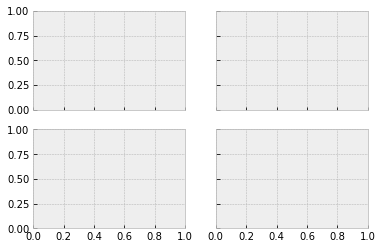

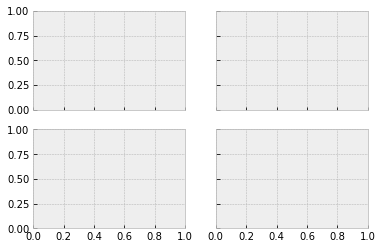

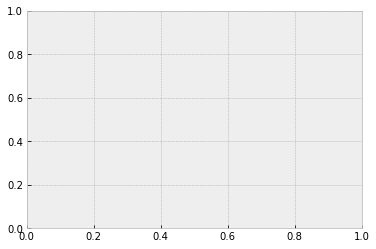

In [8]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
plt.show()

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)

In [ ]:
# # list of countries for comparisson    
# c_list = ["us_dollar", "japanese_yen", "uk_pound", "australian_dollar",a
#           "israeli_shekel", "philippine_peso", "malaysian_ringgit", "romanian_leu"]

# # image
# x_values1 = df_dict["us_dollar"]["date"]
# y_values1 = df_dict["us_dollar"]["rolling_mean_30"]
# x_values2 = df_dict["japanese_yen"]["date"]
# y_values2 = df_dict["japanese_yen"]["rolling_mean_30"]
# x_values3 = df_dict["uk_pound"]["date"]
# y_values3 = df_dict["uk_pound"]["rolling_mean_30"]
# x_values4 = df_dict["australian_dollar"]["date"]
# y_values4 = df_dict["australian_dollar"]["rolling_mean_30"]
# plt.style.use('_classic_test_patch')
# fig = plt.figure(figsize=(12,8))
# ax = fig.add_subplot(111, label = "1")
# ax2 = fig.add_subplot(111, label = "2", frame_on = False)
# ax3 = fig.add_subplot(111, label = "3", frame_on = False)
# ax4 = fig.add_subplot(111, label = "4", frame_on = False)
# # for ax in ax, ax2, ax3, ax4:
# #     ax.xaxis.set_major_locator(years) # format the x ticks
# #     ax.xaxis.set_major_formatter(years_fmt)
# #     fmt_three_years = mdates.MonthLocator(interval = 36) # Major ticks every 3 years
# #     ax.xaxis.set_major_locator(fmt_three_years)
# #     ax.set(yticks=[],
# #            xlabel="Year")
# ax.plot(x_values1, y_values1, color = "blue")
# ax.set_yticks([])
# # ax.set_xlabel("x label 1", color = "C0")
# # ax.set_ylabel("y label 1", color = "C0")
# # ax.tick_params(axis = 'x', colors = "C0")
# # ax.tick_params(axis = 'y', colors = "C0")
# ax2.plot(x_values2, y_values2, color = "green")
# ax2.set_yticks([])
# # ax2.xaxis.tick_top()
# # ax2.yaxis.tick_right()
# # ax2.set_xlabel('x label 2', color = "C1")
# # ax2.set_ylabel('y label 2', color = "C1")
# # ax2.xaxis.set_label_position('top')
# # ax2.yaxis.set_label_position('right')
# # ax2.tick_params(axis = 'x', colors = "C1")
# # ax2.tick_params(axis = 'y', colors = "C1")
# ax3.plot(x_values3, y_values3, color = "yellow")
# ax3.set_yticks([])
# ax4.plot(x_values4, y_values4, color = "purple")
# ax4.set_yticks([])

# plt.show()